In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

590

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea6d912e13d63692711cd7ab65c44314


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | nome
Processing Record 3 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | portland
Processing Record 7 of Set 1 | azimur
City not found. Skipping...
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | zambezi
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | mareeba
Processing Record 12 of Set 1 | odesskoye
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | ixtapa
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | fortuna
Processing Record 17 of Set 1 | port hedland
Processing Record 18 of Set 1 | qarqin
Processing Record 19 of Set 1 | shingu
Processing Record 20 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 21 of Set 1 | new norfolk
P

Processing Record 35 of Set 4 | khani
Processing Record 36 of Set 4 | esperance
Processing Record 37 of Set 4 | barra do garcas
Processing Record 38 of Set 4 | khatanga
Processing Record 39 of Set 4 | birin
Processing Record 40 of Set 4 | wamba
Processing Record 41 of Set 4 | severobaykalsk
Processing Record 42 of Set 4 | mitchell
Processing Record 43 of Set 4 | mount gambier
Processing Record 44 of Set 4 | motygino
Processing Record 45 of Set 4 | peniche
Processing Record 46 of Set 4 | patria
Processing Record 47 of Set 4 | bure
Processing Record 48 of Set 4 | langarud
Processing Record 49 of Set 4 | tugulym
Processing Record 50 of Set 4 | sayansk
Processing Record 1 of Set 5 | asau
Processing Record 2 of Set 5 | dawson creek
Processing Record 3 of Set 5 | bulgan
Processing Record 4 of Set 5 | hamilton
Processing Record 5 of Set 5 | vestmannaeyjar
Processing Record 6 of Set 5 | tarko-sale
Processing Record 7 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 8 of Set

Processing Record 28 of Set 8 | ketchikan
Processing Record 29 of Set 8 | tocopilla
Processing Record 30 of Set 8 | bethel
Processing Record 31 of Set 8 | gamba
Processing Record 32 of Set 8 | progreso
Processing Record 33 of Set 8 | virginia beach
Processing Record 34 of Set 8 | kutum
Processing Record 35 of Set 8 | labytnangi
Processing Record 36 of Set 8 | akyab
Processing Record 37 of Set 8 | sunland park
Processing Record 38 of Set 8 | college
Processing Record 39 of Set 8 | tsaratanana
Processing Record 40 of Set 8 | sao jose da coroa grande
Processing Record 41 of Set 8 | montepuez
Processing Record 42 of Set 8 | sorvag
City not found. Skipping...
Processing Record 43 of Set 8 | malazgirt
Processing Record 44 of Set 8 | colesberg
Processing Record 45 of Set 8 | hofn
Processing Record 46 of Set 8 | mount pleasant
Processing Record 47 of Set 8 | burnie
Processing Record 48 of Set 8 | eyl
Processing Record 49 of Set 8 | kemijarvi
Processing Record 50 of Set 8 | kamyshlov
Processing

Processing Record 17 of Set 12 | bruck an der leitha
Processing Record 18 of Set 12 | kohima
Processing Record 19 of Set 12 | nelson bay
Processing Record 20 of Set 12 | tongren
Processing Record 21 of Set 12 | kushiro
Processing Record 22 of Set 12 | sao gabriel da cachoeira
Processing Record 23 of Set 12 | seoul
Processing Record 24 of Set 12 | srednekolymsk
Processing Record 25 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 26 of Set 12 | kaliningrad
Processing Record 27 of Set 12 | katsuura
Processing Record 28 of Set 12 | ahipara
Processing Record 29 of Set 12 | wilmington
Processing Record 30 of Set 12 | kununurra
Processing Record 31 of Set 12 | bestobe
Processing Record 32 of Set 12 | zhigansk
Processing Record 33 of Set 12 | bainbridge
Processing Record 34 of Set 12 | blagoyevo
Processing Record 35 of Set 12 | oriximina
Processing Record 36 of Set 12 | aquiraz
Processing Record 37 of Set 12 | sorong
Processing Record 38 of Set 12 | wangou
Processing Record 3

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,41.49,79,93,3.89,NZ,2022-07-19 22:04:40
1,Nome,64.5011,-165.4064,45.16,79,100,13.89,US,2022-07-19 22:04:40
2,Albany,42.6001,-73.9662,90.57,48,73,5.01,US,2022-07-19 22:04:41
3,Ushuaia,-54.8000,-68.3000,38.86,75,75,3.44,AR,2022-07-19 22:04:42
4,Portland,45.5234,-122.6762,90.81,43,20,10.36,US,2022-07-19 22:04:42
5,Atuona,-9.8000,-139.0333,78.67,63,6,12.17,PF,2022-07-19 22:00:25
6,Zambezi,-13.5432,23.1047,56.30,47,2,5.73,ZM,2022-07-19 22:04:44
7,Ilulissat,69.2167,-51.1000,51.82,66,75,2.30,GL,2022-07-19 22:04:44
8,Mareeba,-17.0000,145.4333,64.44,90,3,1.88,AU,2022-07-19 22:00:19
9,Odesskoye,54.2111,72.9651,62.83,63,97,7.85,RU,2022-07-19 22:04:45


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-07-19 22:04:40,-46.1927,168.8643,41.49,79,93,3.89
1,Nome,US,2022-07-19 22:04:40,64.5011,-165.4064,45.16,79,100,13.89
2,Albany,US,2022-07-19 22:04:41,42.6001,-73.9662,90.57,48,73,5.01
3,Ushuaia,AR,2022-07-19 22:04:42,-54.8000,-68.3000,38.86,75,75,3.44
4,Portland,US,2022-07-19 22:04:42,45.5234,-122.6762,90.81,43,20,10.36
5,Atuona,PF,2022-07-19 22:00:25,-9.8000,-139.0333,78.67,63,6,12.17
6,Zambezi,ZM,2022-07-19 22:04:44,-13.5432,23.1047,56.30,47,2,5.73
7,Ilulissat,GL,2022-07-19 22:04:44,69.2167,-51.1000,51.82,66,75,2.30
8,Mareeba,AU,2022-07-19 22:00:19,-17.0000,145.4333,64.44,90,3,1.88
9,Odesskoye,RU,2022-07-19 22:04:45,54.2111,72.9651,62.83,63,97,7.85


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1658269389.0252829

In [15]:
#Get today's date in seconds
today = time.time()
today

1658269389.0685432

In [16]:
today = time.strftime("%x")
today

'07/19/22'

In [17]:
# Import time module
import time

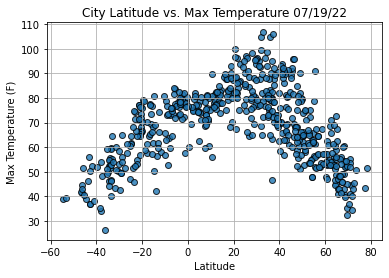

In [18]:


# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

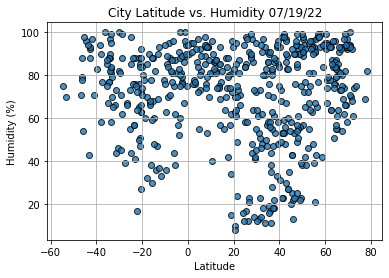

In [19]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

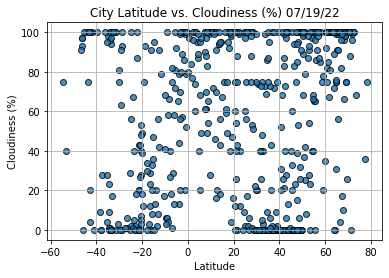

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

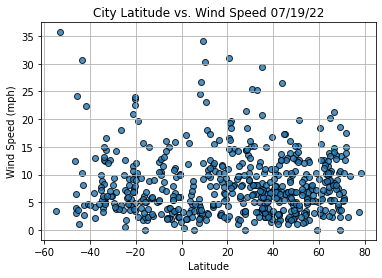

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                      Fortuna
Country                        US
Date          2022-07-19 22:04:48
Lat                       40.5982
Lng                     -124.1573
Max Temp                    69.85
Humidity                       68
Cloudiness                     31
Wind Speed                    7.4
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0 

0      False
1       True
2       True
3      False
4       True
       ...  
545    False
546    False
547    False
548     True
549     True
Name: Lat, Length: 550, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Nome,US,2022-07-19 22:04:40,64.5011,-165.4064,45.16,79,100,13.89
2,Albany,US,2022-07-19 22:04:41,42.6001,-73.9662,90.57,48,73,5.01
4,Portland,US,2022-07-19 22:04:42,45.5234,-122.6762,90.81,43,20,10.36
7,Ilulissat,GL,2022-07-19 22:04:44,69.2167,-51.1000,51.82,66,75,2.30
9,Odesskoye,RU,2022-07-19 22:04:45,54.2111,72.9651,62.83,63,97,7.85
...,...,...,...,...,...,...,...,...,...
542,Zhigansk,RU,2022-07-19 22:23:02,66.7697,123.3711,41.23,73,82,21.27
543,Bainbridge,US,2022-07-19 22:18:46,47.6262,-122.5212,84.99,54,0,10.36
544,Blagoyevo,RU,2022-07-19 22:23:03,63.3667,47.9167,61.41,96,100,8.84
548,Wangou,CN,2022-07-19 22:23:07,42.0623,126.9127,62.85,98,87,2.86


In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Nome,US,2022-07-19 22:04:40,64.5011,-165.4064,45.16,79,100,13.89
2,Albany,US,2022-07-19 22:04:41,42.6001,-73.9662,90.57,48,73,5.01
4,Portland,US,2022-07-19 22:04:42,45.5234,-122.6762,90.81,43,20,10.36
7,Ilulissat,GL,2022-07-19 22:04:44,69.2167,-51.1000,51.82,66,75,2.30
9,Odesskoye,RU,2022-07-19 22:04:45,54.2111,72.9651,62.83,63,97,7.85


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

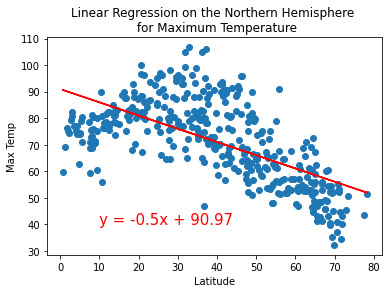

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))


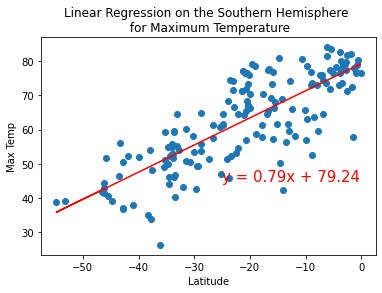

In [29]:
# Linear regression on the Southern Hemisphere for Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-25,45))

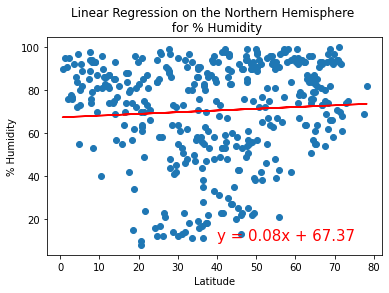

In [45]:
# Linear regression on the Northern Hemisphere for % Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Northern Hemisphere \n for % Humidity", 
                       "% Humidity", (40,10))


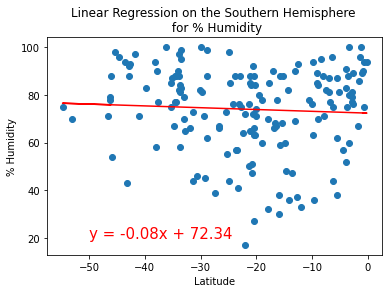

In [47]:
# Linear regression on the Southern Hemisphere for % Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Southern Hemisphere \n for % Humidity", 
                       "% Humidity", (-50,20))

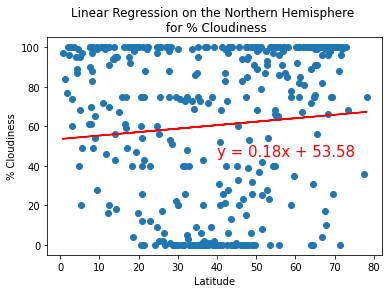

In [59]:
# Linear regression on the Northern Hemisphere for % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness", 
                       "% Cloudiness", (40,45))

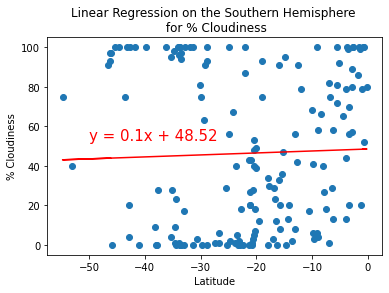

In [58]:
# Linear regression on the Southern Hemisphere for % Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Southern Hemisphere \n for % Cloudiness", 
                       "% Cloudiness", (-50,53))

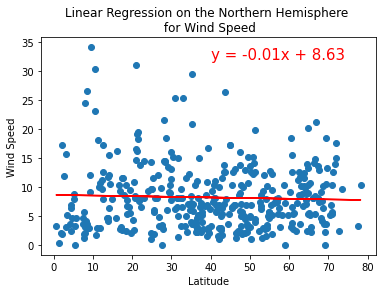

In [61]:
# Linear Regression on the Northern Hempishere for WIND SPEED
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Northern Hemisphere \n for Wind Speed", 
                       "Wind Speed", (40,32))

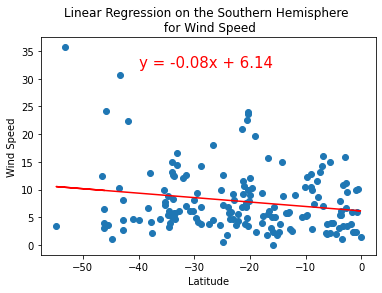

In [63]:
# Linear Regression on the Southern Hempishere for WIND SPEED
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Southern Hemisphere \n for Wind Speed", 
                       "Wind Speed", (-40,32))